In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [10]:
SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
HAM_PROB_FILE = 'SpamData/03_Testing/prob-ham.txt'
ALL_PROB_FILE = 'SpamData/03_Testing/prob-all.txt'

TEST_FEATURE_FILE = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

## Load the Data

In [11]:
## Features
X_test = np.loadtxt(TEST_FEATURE_FILE, delimiter = ' ')
## Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')

## Token Probabilities
prob_spam = np.loadtxt(SPAM_PROB_FILE, delimiter = ' ')
prob_ham = np.loadtxt(HAM_PROB_FILE, delimiter = ' ')
prob_all = np.loadtxt(ALL_PROB_FILE, delimiter = ' ')

In [12]:
prob_spam.shape

(2500,)

In [13]:
X_test.dot(prob_spam).shape

(1723,)

## Set the prior

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam \,) \, P(Spam)} {P(X)}$$


In [14]:
PROB_SPAM = 0.3116

In [15]:
np.log(prob_spam)

array([ -4.70347725,  -5.31317544,  -4.97906728, ...,  -8.72267163,
       -10.80211317, -10.57896962])

## Joint Probability in log format

In [23]:
joint_log_spam = X_test.dot(np.log(prob_spam) - np.log(prob_all)) + np.log(PROB_SPAM)

In [24]:
joint_log_spam[:5]

array([  3.27944939,  15.72824811,  19.5636709 , -16.3940885 ,
        28.65532099])

## Set the prior

$$P(Ham \, | \, X) = \frac{P(X \, | \, Ham \,) \, (1-P(Spam))} {P(X)}$$


In [18]:
joint_log_ham = X_test.dot(np.log(prob_ham) - np.log(prob_all)) + np.log(1-PROB_SPAM)

In [19]:
joint_log_ham[:5]

array([-11.08366791, -40.13384316, -38.49031389,  -2.88574463,
       -60.6483069 ])

In [20]:
joint_log_ham.size

1723

# Making Predictions

### Checking for higher joint probability

$$P(Spam \, | \, x) \, > \, P(Ham \, | \, X)$$
<br>
<center>OR</center>
<br>
$$P(Spam \, | \, x) \, < \, P(Ham \, | \, X)$$


In [25]:
prediction = joint_log_spam > joint_log_ham

In [27]:
prediction[-5:]

array([False, False, False, False, False])

## Simplifying

In [28]:
joint_log_spam = X_test.dot(np.log(prob_spam)) + np.log(PROB_SPAM)  ## Since np.log(prob_all) is common to both equation, we can ignore it
joint_log_ham = X_test.dot(np.log(prob_ham)) + np.log(1-PROB_SPAM)


# Metrics and Evaluation

### Accuracy

In [31]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly', correct_docs)

Docs classified correctly 1673


In [32]:
numdocs_incorrect = X_test.shape[0] - correct_docs
print('Docs classified incorrectly', numdocs_incorrect)

Docs classified incorrectly 50


In [35]:
# Accuracy
print('Accuracy of the model is {:.2%}'.format(correct_docs/len(X_test)))

Accuracy of the model is 97.10%


## Visualizing the results

In [40]:
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | Ham)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

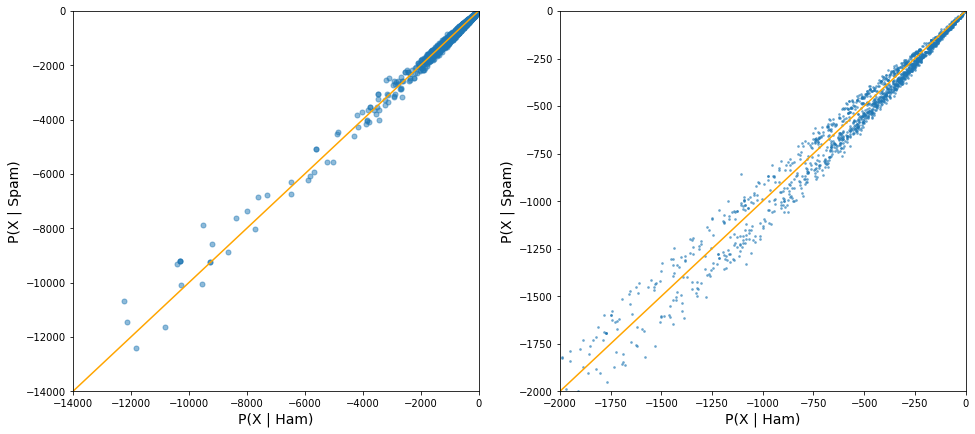

In [44]:
plt.figure(figsize=(16, 7))

# Chart 1
plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

#Chart 2
plt.subplot(1, 2, 2)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(joint_log_ham, joint_log_spam, alpha=0.5, s=3)
plt.plot(linedata, linedata, color='orange')

plt.show()

In [46]:
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, labels: y_test})

/Users/s1b09yf/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


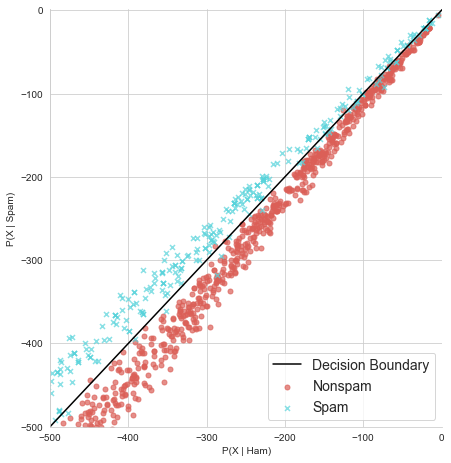

In [55]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5, fit_reg=False, legend=False,
           scatter_kws={'alpha': 0.7, 's': 25}, hue=labels, markers=['o', 'x'], palette='hls')

plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

### False Positives and False Negatives

In [56]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1167,  556]))

In [60]:
true_pos = (y_test == 1) & (prediction == 1)

In [61]:
true_pos.sum()

547

In [62]:
false_pos = (y_test == 0) & (prediction == 1)

In [63]:
false_pos.sum()

9

In [64]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

41

In [69]:
# Recall

recall_score = true_pos.sum()/ (true_pos.sum() + false_neg.sum())
print('Recall score is {:.2%}'.format(recall_score))

Recall score is 93.03%


In [71]:
# Precision

precision = true_pos.sum()/ (true_pos.sum() + false_pos.sum())
print('Precision is {:.2%}'.format(precision))

Precision is 98.38%


In [73]:
# F-score

F_score = 2 * (precision * recall_score) / (precision + recall_score)
print('F-score is {:.2}'.format(F_score))

F-score is 0.96
